In [1]:
import numpy as np, matplotlib.pyplot as plt

In [182]:
G = 4*np.pi**2
dim = 2

def rk2_step(state, rhs, dt):
    k1 = rhs(state)
    k2 = rhs(state + k1*dt/2)
    new_state = state + dt*k2
    return new_state

def newtonian_gravity(states): # derivatives function
    result = np.empty_like(states)
    
    for i in range(len(states)):
        pos,vel = states[i]
        netforce = np.zeros(dim)
        # F = GmM/r^2 in the direction of r
        # F = ma -> a = F/m
        for j in range(N):
            if i!=j:
                otherpos, othervel = states[j]
                curly_r = otherpos-pos
                force = G*masses[i]*masses[j]/(np.linalg.norm(curly_r)**2)
                direction = curly_r/np.linalg.norm(curly_r)
                netforce += direction*force
            else:
                pass
        accel = netforce/masses[i]
        result[i] = np.array([vel,accel])
    velocities = result[:,0]
    cm_vel = np.array([masses[i]*np.array(velocities[i]) for i in range(N)])/np.sum(masses)
    result[:,0] = velocities-cm_vel
    return result

def orbit_calc(pos0, vel0, time_domain):
    states_array = np.zeros((len(time_domain),N,2,dim)) # # of steps, # of bodies, pos and vel in dim dimensions
    for body in range(N):
        states_array[0,body,:,:] = np.array([pos0[body], vel0[body]])

    for i in range(len(time_domain)-1):
        dt = time_domain[i+1]-time_domain[i]

        rk_state = rk2_step(states_array[i],newtonian_gravity,dt)
        states_array[i+1] = rk_state
        print("\r%.6f"%time_domain[i],end="")
    return states_array

In [346]:
M1 = 1
M2 = 1e-1
M3 = 1e-4
r12 = 1
r23 = 0.2
r1 = [0,0]
r2 = [r12,0]
r3 = [r12+r23,0]

v1 = [0,0]
v2 = [0, np.sqrt(G*(M1+M2)/r12)]
v3 = [0, v2[1]+np.sqrt(G*(M2+M3)/r23)]

masses = [M1,M2,M3]
N = len(masses)
year = orbit_calc([r1,r2,r3],
                  [v1,v2,v3],
                  np.arange(0,3,1e-4))

2.999800

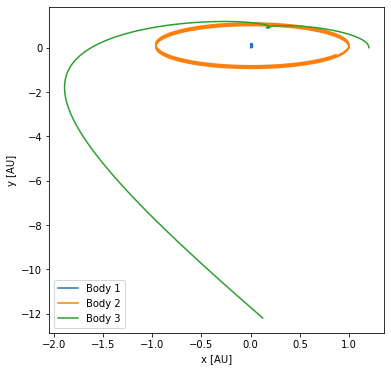

In [347]:
fig = plt.figure(figsize=(6,6))
plt.plot(year[:,0,0,0],year[:,0,0,1],label="Body 1")
plt.plot(year[:,1,0,0],year[:,1,0,1],label="Body 2")
plt.plot(year[:,2,0,0],year[:,2,0,1],label="Body 3")
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")

plt.legend()
#fig.savefig("4.png",dpi=300,bbox_inches="tight")

[-0.00029961  0.00029992]
[1.0192 1.0193]


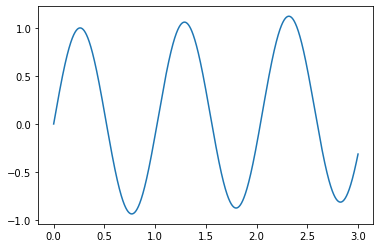

In [354]:
plt.plot(np.arange(0,3,1e-4),year[:,1,0,1])
print(year[10192:10194,1,0,1])
print(np.arange(0,3,1e-4)[10192:10194])

In [356]:
t, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3 = np.loadtxt("3body_full12_out.log",unpack=True)

In [357]:
pos1 = np.vstack((x1,y1)).T
pos2 = np.vstack((x2,y2)).T
pos3 = np.vstack((x3,y3)).T
CM = (pos1+pos2+pos3)/3

In [358]:
KE = 0.5*(vx1**2+vy1**2+vx2**2+vy2**2+vx3**2+vy3**2)
PE = -G/np.sqrt((x1-x2)**2+(y1-y2)**2) - G/np.sqrt((x3-x2)**2+(y3-y2)**2) - G/np.sqrt((x1-x3)**2+(y1-y3)**2)

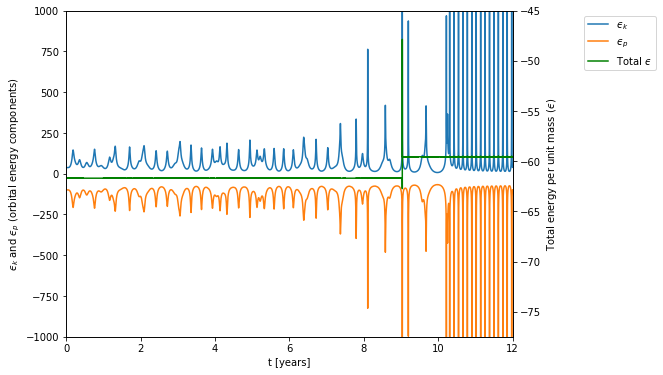

In [360]:
fig, ax = plt.subplots(figsize=(8,6))
l1 = ax.plot(t,KE,label="$ϵ_k$")
l2 = ax.plot(t,PE,label="$ϵ_p$")
ax.set_ylabel("$ϵ_k$ and $ϵ_p$ (orbital energy components)")
ax.set_xlabel("t [years]")
ax.set_ylim(-1000,1000)
ax.set_xlim(0,12)
ax2 = ax.twinx()

l3 = ax2.plot(t,KE+PE,"g",label="Total $ϵ$")
ax2.set_ylabel("Total energy per unit mass ($ϵ$)")
ax2.set_ylim(-77.5,-45)
lines = l1+l2+l3
labs = [l.get_label() for l in lines]
plt.legend(lines,labs, loc="upper left",bbox_to_anchor=(1.15,1))
fig.savefig("q2_energy.png",dpi=300,bbox_inches="tight")

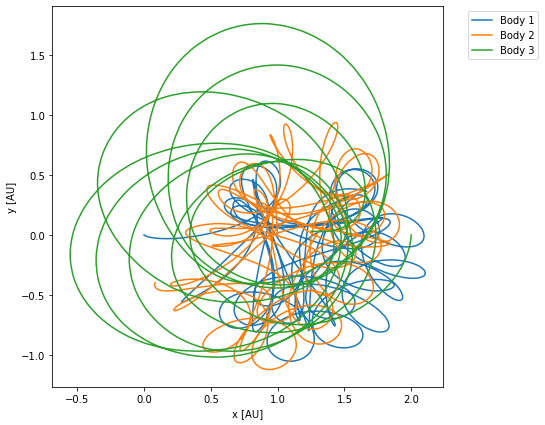

In [363]:
fig = plt.figure(figsize=(7,7))
plt.plot(x1[:int(2*len(t)/3)]-CM[:int(2*len(t)/3),0]+1,y1[:int(2*len(t)/3)]-CM[:int(2*len(t)/3),1],label="Body 1")
plt.plot(x2[:int(2*len(t)/3)]-CM[:int(2*len(t)/3),0]+1,y2[:int(2*len(t)/3)]-CM[:int(2*len(t)/3),1],label="Body 2")
plt.plot(x3[:int(2*len(t)/3)]-CM[:int(2*len(t)/3),0]+1,y3[:int(2*len(t)/3)]-CM[:int(2*len(t)/3),1],label="Body 3")
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")
plt.legend(loc="upper left",bbox_to_anchor=(1.05,1))
fig.savefig("p2_CM_scaled.png",dpi=300,bbox_inches="tight")

In [366]:
smallest_dist = [min(np.linalg.norm(pos1[i]-pos2[i]),np.linalg.norm(pos2[i]-pos3[i]),np.linalg.norm(pos1[i]-pos3[i])) for i in range(len(t))]

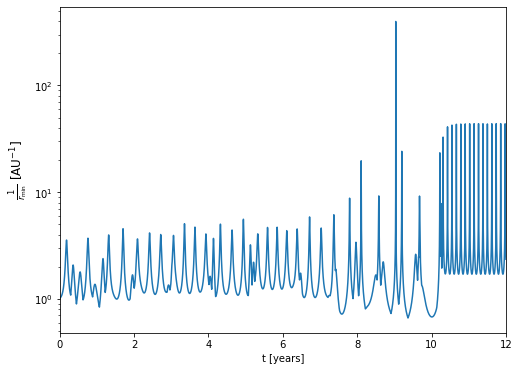

In [391]:
fig = plt.figure(figsize=(8,6))
plt.plot(t[::100],1/np.array(smallest_dist[::100]))
plt.ylabel(r"$\frac{1}{r_\mathrm{min}}$ [AU$^{-1}$]",size=12)
plt.xlabel("t [years]")
plt.yscale("log")
plt.xlim(0,12)
fig.savefig("minsep.png",dpi=300,bbox_inches="tight")

In [399]:
np.save("min_sep.npy",np.vstack((t[::100],1/np.array(smallest_dist[::100]))))